**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from pycobra.classifiercobra import ClassifierCobra
from pycobra.diagnostics import Diagnostics

**LOADING DATASET**

In [2]:
data = pd.read_csv("haberman.csv")
data.head()

,Age,Year_of_operation,Axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      306 non-null    int64
 1   Year_of_operation        306 non-null    int64
 2   Axillary_nodes_detected  306 non-null    int64
 3   Survival_status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
data.describe()

,Age,Year_of_operation,Axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
# not survived = 0, survived = 1
data['Survival_status'] = data['Survival_status'].replace([2],0)
data.head()

,Age,Year_of_operation,Axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year_of_operation'}>],
       [<AxesSubplot:title={'center':'Axillary_nodes_detected'}>,
        <AxesSubplot:title={'center':'Survival_status'}>]], dtype=object)

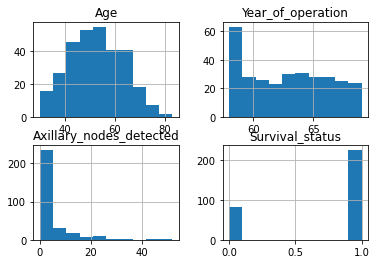

In [6]:
data.hist()

In [7]:
data['Survival_status'].value_counts()

1    225
0     81
Name: Survival_status, dtype: int64

In [8]:
data[data['Survival_status']==0].describe()

,Age,Year_of_operation,Axillary_nodes_detected,Survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,0.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,0.0
25%,46.000000,59.000000,1.000000,0.0
50%,53.000000,63.000000,4.000000,0.0
75%,61.000000,65.000000,11.000000,0.0
max,83.000000,69.000000,52.000000,0.0


In [9]:
data[data['Survival_status']==1].describe()

,Age,Year_of_operation,Axillary_nodes_detected,Survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


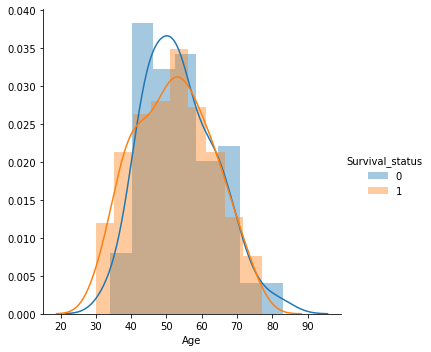

In [10]:
sns.FacetGrid(data,hue='Survival_status',height = 5).map(sns.distplot,'Age').add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


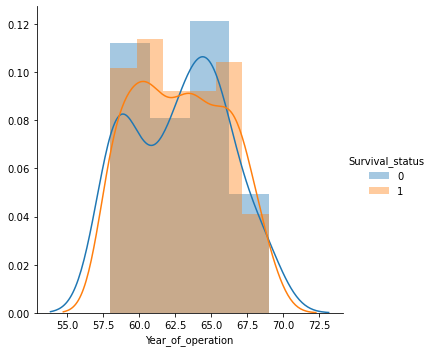

In [11]:
sns.FacetGrid(data,hue='Survival_status',height = 5).map(sns.distplot,'Year_of_operation').add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


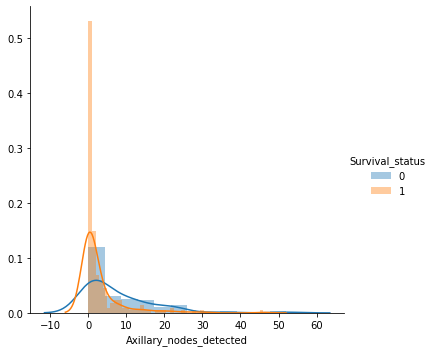

In [12]:
sns.FacetGrid(data,hue='Survival_status',height = 5).map(sns.distplot,'Axillary_nodes_detected').add_legend()

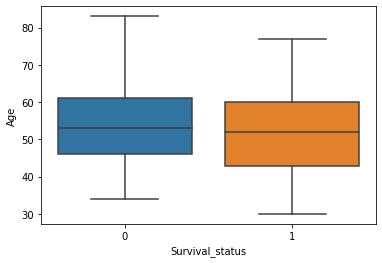

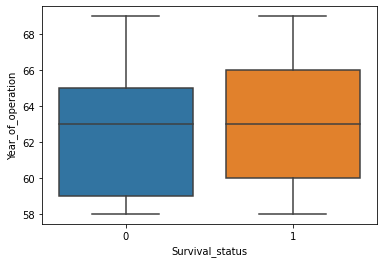

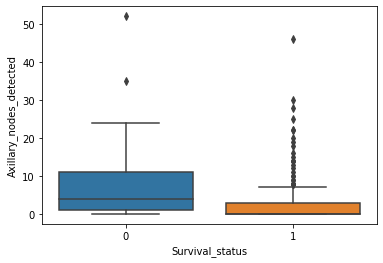

In [13]:
sns.boxplot(x='Survival_status',y='Age',data=data)
plt.show()
sns.boxplot(x='Survival_status',y='Year_of_operation',data=data)
plt.show()
sns.boxplot(x='Survival_status',y='Axillary_nodes_detected',data=data)
plt.show()

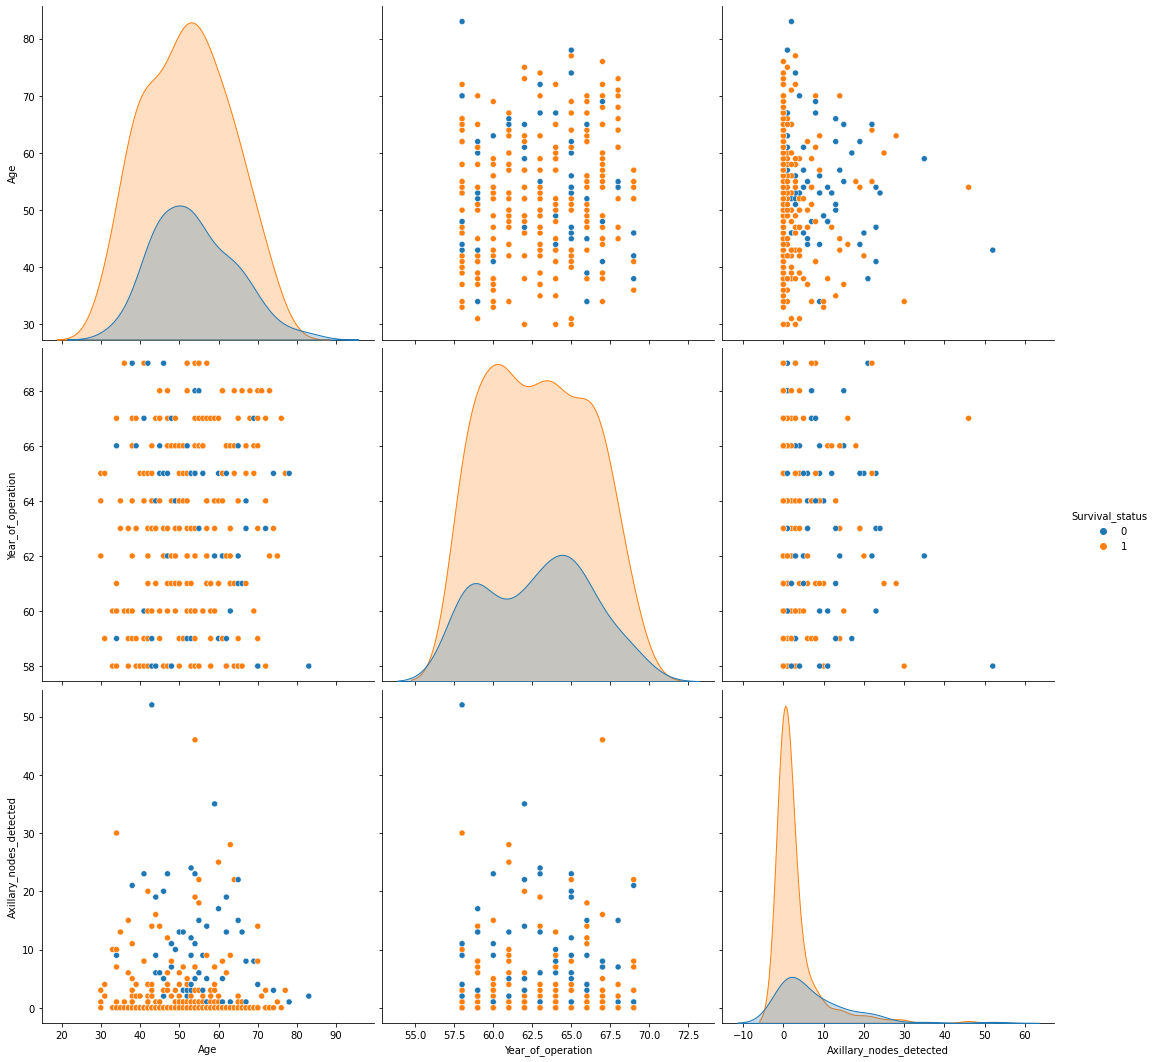

In [22]:
sns.pairplot(data, hue = 'Survival_status',height = 5)

**SPLITTING THE DATASET**

In [15]:
X = data.drop('Survival_status', axis = 1)
Y = data['Survival_status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

**TRAINING USING DIFFERENT CLASSIFIER**

In [16]:
algorithms = [('TREE', DecisionTreeClassifier()),('KNN', KNeighborsClassifier()) , ('SVM', SVC())]
# evaluate each model in turn
for name, algorithm in algorithms:
    kfold = KFold(n_splits=20, random_state=10,shuffle=True) 
    cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring='accuracy')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.657051 (0.134715)
KNN: 0.724679 (0.138845)
SVM: 0.712821 (0.092219)


In [17]:
for name, algorithm in algorithms:
    model =  algorithm
    Y_pred = model.fit(X_train, Y_train).predict(X_test)
    print(name)
    print(classification_report(Y_test, Y_pred))

TREE
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.88      0.79      0.83        47

    accuracy                           0.76        62
   macro avg       0.69      0.73      0.70        62
weighted avg       0.79      0.76      0.77        62

KNN
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        15
           1       0.77      0.87      0.82        47

    accuracy                           0.71        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.67      0.71      0.68        62

SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      0.98      0.85        47

    accuracy                           0.74        62
   macro avg       0.38      0.49      0.43        62
weighted avg       0.57      0.74      0.65        62



**TRAINING USING COBRA**

In [18]:
cc = ClassifierCobra(machine_list='basic')
Y_pred_cob = cc.fit(X_train, Y_train).predict(X_test)

In [19]:
cc_diag = Diagnostics(cc, X_test, Y_test)
cc_diag.load_errors()
cc_diag.machine_error

{'ClassifierCobra': 0.24193548387096775,
 'tree': 0.22580645161290325,
 'knn': 0.29032258064516125,
 'svm': 0.24193548387096775}

In [20]:
print("accuracy score = ", accuracy_score(Y_test, Y_pred_cob))
print("\nconfusion matrix =\n", confusion_matrix(Y_test, Y_pred_cob))
print("\nclassification report\n", classification_report(Y_test, Y_pred_cob))

accuracy score =  0.7580645161290323

confusion matrix =
 [[ 2 13]
 [ 2 45]]

classification report
               precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.78      0.96      0.86        47

    accuracy                           0.76        62
   macro avg       0.64      0.55      0.53        62
weighted avg       0.71      0.76      0.70        62

